<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/NSF_Logistic_Regression_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict NSF Within 7 Months

## Import Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Connect to GBQ

In [ ]:
import pandas_gbq
import pydata_google_auth

SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',
]

# get credentials
credentials = pydata_google_auth.get_user_credentials(
    SCOPES,
    auth_local_webserver=False)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=0X8VdC6N8o0TegiiAvousCFWpR4d91&prompt=consent&access_type=offline
Enter the authorization code: 4/1wHzDxbkk7hdYEFVSPVmD4_CPqpFJEbld1WoG0KQhC3XoClBLM051Rs


In [ ]:
# GBQ
sql = """
SELECT * 
FROM `ffam-dp-loan-ops-stg.report_views.v_fplus_nsf_ml_data`
"""

In [ ]:
# run query
raw_data = pandas_gbq.read_gbq(sql,
                               project_id='ffam-dp-loan-ops-stg',
                               credentials=credentials,
                               dialect='standard'
                               )

## View Data

In [ ]:
# view top 5 observations
raw_data.head()

,loan_number,loan_id,loan_group_short_desc,c_status_code_desc,open_date,closed_date,first_principal_payment_date,initial_chargeoff_date,min_nsf_effective_date,days_to_nsf,months_to_nsf,min_ach_disabled_date,ach_disabled_before_nsf_flag,min_mod_created_date,mod_before_nsf_flag,min_IB_comment_date,IB_before_nsf_flag,min_trial_balance_date,dpd_before_nsf_flag,month_of_open,day_of_first_principal_pmt,week_day_of_first_principal_pmt,ach_origination_flag,welcome_call_completed_flag,los_application_id,age,final_risk_group,risk_tier,dti,lti,ndi_ratio,verifiable_annual_income,final_loan_amount,final_loan_amount_band,loan_band_10K_flag,loan_band_15K_flag,loan_band_18K_flag,loan_band_20K_flag,loan_band_25K_flag,loan_band_30K_flag,...,pct_trades_never_dq,pct_trades_ever_30_plus_dpd,months_since_most_recent_dpd,days_bt_oldest_and_recent_trade_opened_last_6_mo,total_monthly_pmt_open_trades,total_monthly_pmt_open_trades_excl_real_estate,total_monthly_pmt_trades_with_balance,total_monthly_pmt_trades_with_balance_joint,number_trades_auto,number_open_trades_auto,total_balance_auto,total_monthly_pmt_open_trades_auto,number_trades_open_bankcard,number_trades_bankcard_opened_last_12_mo,days_dq_bankcard_last_12_mo,balance_to_credit_limit_ratio_bankcard_last_6_mo,total_balance_installment_last_6_mo,pct_installment_never_dq,pct_installment_ever_30_plus_dpd,number_inquiries_last_6_months,months_since_most_recent_inquiry,number_trades_mortgage,has_mortgage,total_monthly_pmt_mortgage,number_trades_revolving,number_open_trades_revolving_last_6_mo,number_trades_revolving_never_dq,number_trades_revolving_ever_dq,total_credit_limit_revolving_trades_last_6_mo,total_balance_open_revolving_trades_last_6_mo,num_of_nsf,nsf_flag,nsf_first_pmt_flag,nsf_wi_3_mo_flag,nsf_wi_7_mo_flag,nsf_wi_13_mo_flag,charge_off_flag,dpd_30_flag,dpd_60_flag,dpd_90_flag
0,314514,APP-04189401,F+,CLOSED,2019-03-28,2019-09-27,2019-04-16,2019-09-27,NaT,NaN,NaN,2019-04-16,0,NaT,0,2019-04-18,0,2019-05-17,0,3,16,3,1,1,3159284.0,71,4.0,2.0,14.4,34.6,60.6,25992.0,9000.00,<10K,1,0,0,0,0,0,...,0.86,0.14,81.0,0.0,233.0,233.0,233.0,233.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,0.30,0.0,0.67,0.33,1.0,3.0,0.0,0.0,0.0,9.0,5.0,9.0,0.0,19201.0,6799.0,0,0,0,0,0,0,1,1,1,1
1,263318,APP-02956739,F+,CLOSED,2018-10-24,2019-09-26,2018-12-04,2019-09-26,2019-05-04,192.0,7.0,2019-05-04,0,NaT,0,2018-12-05,1,2019-05-07,0,10,4,3,1,1,2342778.0,60,6.0,2.0,29.5,25.4,51.5,63000.0,15999.00,15K to 18K,0,0,1,0,0,0,...,1.00,0.05,0.0,0.0,2496.0,2496.0,2496.0,2496.0,2.0,1.0,13578.0,263.0,3.0,1.0,0.0,0.63,13578.0,1.00,0.00,2.0,0.0,1.0,1.0,1156.0,15.0,11.0,15.0,0.0,27749.0,32101.0,1,1,0,0,1,1,1,1,1,1
2,159599,APP-01191880,F+,CLOSED,2017-08-30,2019-10-30,2017-09-16,2019-10-30,2019-06-16,655.0,22.0,2019-06-16,0,NaT,0,NaT,0,2019-06-19,0,8,16,7,1,0,988579.0,55,12.0,3.0,31.3,34.7,64.7,36000.0,12500.00,10K to 15K,0,1,0,0,0,0,...,0.86,0.14,66.0,0.0,965.0,965.0,965.0,752.0,6.0,1.0,8112.0,426.0,2.0,0.0,0.0,0.61,20149.0,0.89,0.11,1.0,5.0,0.0,0.0,0.0,12.0,4.0,10.0,1.0,7600.0,3750.0,6,1,0,0,0,0,1,1,1,1
3,199994,APP-01625244,F+,CLOSED,2018-03-01,2019-12-30,2018-04-10,2019-12-30,2019-08-10,527.0,17.0,2019-08-10,0,2018-09-25,1,2018-07-31,1,2018-09-11,1,3,10,3,1,0,1359464.0,53,11.0,3.0,19.7,28.8,31.0,88400.0,32890.99,30K to 35K,0,0,0,0,0,0,...,0.46,0.58,22.0,0.0,644.0,644.0,644.0,340.0,3.0,1.0,34446.0,609.0,0.0,0.0,0.0,0.00,34446.0,1.00,0.00,2.0,0.0,0.0,0.0,0.0,16.0,2.0,3.0,11.0,4426.0,274.0,1,1,0,0,0,0,1,1,1,1
4,164800,APP-01264354,F+,CLOSED,2017-09-21,2019-06-27,2017-10-21,2019-06-27,NaT,NaN,NaN,2018-12-21,0,2019-04-12,0,2018-06-20,0,2018-09-22,0,9,21,7,1,0,1053667.0,31,6.0,2.0,25.7,12.2,39.0,50000.0,10999.00,10K to 15K,0,1,0,0,0,0,...,1.00,0.00,0.0,0.0,1119.0,1119.0,1119.0,688.0,5.0,2.0,56073.0,862.0,3.0,0.0,0.0,0.83,56073.0,1.00,0.00,1.0,6.0,0.0,0.0,0.0,7.0,4.0,7.0,0.0,6834.0,8866.0,0,0,0,0,0,0,1,1,1,1


In [ ]:
# view bottom 5 observations
raw_data.tail()

,loan_number,loan_id,loan_group_short_desc,c_status_code_desc,open_date,closed_date,first_principal_payment_date,initial_chargeoff_date,min_nsf_effective_date,days_to_nsf,months_to_nsf,min_ach_disabled_date,ach_disabled_before_nsf_flag,min_mod_created_date,mod_before_nsf_flag,min_IB_comment_date,IB_before_nsf_flag,min_trial_balance_date,dpd_before_nsf_flag,month_of_open,day_of_first_principal_pmt,week_day_of_first_principal_pmt,ach_origination_flag,welcome_call_completed_flag,los_application_id,age,final_risk_group,risk_tier,dti,lti,ndi_ratio,verifiable_annual_income,final_loan_amount,final_loan_amount_band,loan_band_10K_flag,loan_band_15K_flag,loan_band_18K_flag,loan_band_20K_flag,loan_band_25K_flag,loan_band_30K_flag,...,pct_trades_never_dq,pct_trades_ever_30_plus_dpd,months_since_most_recent_dpd,days_bt_oldest_and_recent_trade_opened_last_6_mo,total_monthly_pmt_open_trades,total_monthly_pmt_open_trades_excl_real_estate,total_monthly_pmt_trades_with_balance,total_monthly_pmt_trades_with_balance_joint,number_trades_auto,number_open_trades_auto,total_balance_auto,total_monthly_pmt_open_trades_auto,number_trades_open_bankcard,number_trades_bankcard_opened_last_12_mo,days_dq_bankcard_last_12_mo,balance_to_credit_limit_ratio_bankcard_last_6_mo,total_balance_installment_last_6_mo,pct_installment_never_dq,pct_installment_ever_30_plus_dpd,number_inquiries_last_6_months,months_since_most_recent_inquiry,number_trades_mortgage,has_mortgage,total_monthly_pmt_mortgage,number_trades_revolving,number_open_trades_revolving_last_6_mo,number_trades_revolving_never_dq,number_trades_revolving_ever_dq,total_credit_limit_revolving_trades_last_6_mo,total_balance_open_revolving_trades_last_6_mo,num_of_nsf,nsf_flag,nsf_first_pmt_flag,nsf_wi_3_mo_flag,nsf_wi_7_mo_flag,nsf_wi_13_mo_flag,charge_off_flag,dpd_30_flag,dpd_60_flag,dpd_90_flag
49736,192605,APP-01584908,F+,CLOSED,2018-01-31,2019-04-19,2018-03-15,2019-04-19,NaT,NaN,NaN,NaT,0,NaT,0,2018-02-26,0,NaT,0,1,15,5,0,1,1325822.0,56,8.0,3.0,14.8,30.9,27.2,97000.0,29999.00,25K to 30K,0,0,0,0,0,1,...,1.00,0.25,0.0,0.0,804.0,804.0,804.0,804.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.91,15525.0,1.00,0.00,0.0,22.0,0.0,0.0,0.0,5.0,3.0,5.0,0.0,3311.0,8389.0,0,0,0,0,0,0,1,0,0,0
49737,155042,APP-01155156,F+,CLOSED,2017-08-09,2018-05-24,2017-09-23,2018-05-24,2018-04-23,257.0,8.0,2018-05-23,0,NaT,0,2018-02-28,1,2017-09-24,1,8,23,7,0,1,955955.0,50,7.0,2.0,34.0,20.2,62.5,42000.0,8500.00,<10K,1,0,0,0,0,0,...,0.80,0.20,0.0,0.0,1049.0,1049.0,1074.0,1074.0,2.0,1.0,7705.0,333.0,2.0,0.0,0.0,0.12,26953.0,0.75,0.25,1.0,3.0,0.0,0.0,0.0,22.0,10.0,18.0,4.0,24329.0,2895.0,2,1,0,0,0,1,1,0,0,0
49738,45286,APP-00163881,F+,CLOSED,2015-08-10,2017-06-21,2015-09-17,2017-06-21,NaT,NaN,NaN,2016-05-17,0,NaT,0,NaT,0,2017-05-01,0,8,17,5,1,0,99942.0,38,8.0,3.0,10.9,17.5,20.9,120000.0,21053.00,20K to 25K,0,0,0,0,1,0,...,0.80,0.20,7.0,0.0,1406.0,1406.0,1232.0,1232.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.76,856.0,0.00,1.00,1.0,0.0,0.0,0.0,0.0,8.0,5.0,7.0,0.0,8413.0,24295.0,0,0,0,0,0,0,1,1,0,0
49739,78777,APP-00403095,F+,CLOSED,2016-04-27,2018-01-31,2016-06-09,2018-01-31,2017-03-09,316.0,11.0,2017-03-09,0,NaT,0,2017-12-22,0,2017-03-13,0,4,9,5,1,0,300676.0,50,12.0,3.0,9.0,9.9,40.0,43400.0,7672.23,<10K,1,0,0,0,0,0,...,0.86,0.14,34.0,62.0,138.0,138.0,301.0,301.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.87,0.0,0.67,0.33,2.0,1.0,0.0,0.0,0.0,17.0,4.0,17.0,0.0,2070.0,8230.0,1,1,0,0,0,1,1,1,1,1
49740,85276,APP-00467192,F+,CLOSED,2016-06-22,2017-12-07,2016-08-01,2017-12-07,2017-09-21,456.0,15.0,2017-10-21,0,NaT,0,NaT,0,2017-09-25,0,6,1,2,1,0,358947.0,49,5.0,2.0,21.1,22.2,55.7,135000.0,30000.00,30K to 35K,0,0,0,0,0,0,...,1.00,0.00,0.0,0.0,3887.0,3887.0,3872.0,3678.0,2.0,1.0,16878.0,388.0,3.0,0.0,0.0,0.39,55671.0,1.00,0.00,3.0,0.0,1.0,1.0,2134.0,8.0,3.0,8.0,0.0,10881.0,6819.0,2,1,0,0,0,0,1,1,1,0


In [ ]:
# df info
raw_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49741 entries, 0 to 49740
Data columns (total 152 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   loan_number                                       49741 non-null  int64         
 1   loan_id                                           49741 non-null  object        
 2   loan_group_short_desc                             49741 non-null  object        
 3   c_status_code_desc                                49741 non-null  object        
 4   open_date                                         49741 non-null  datetime64[ns]
 5   closed_date                                       49741 non-null  datetime64[ns]
 6   first_principal_payment_date                      49741 non-null  datetime64[ns]
 7   initial_chargeoff_date                            9817 non-null   datetime64[ns]
 8   min_nsf_effective_date   

In [ ]:
# df describe
raw_data.describe()

,loan_number,days_to_nsf,months_to_nsf,ach_disabled_before_nsf_flag,mod_before_nsf_flag,IB_before_nsf_flag,dpd_before_nsf_flag,month_of_open,day_of_first_principal_pmt,week_day_of_first_principal_pmt,ach_origination_flag,welcome_call_completed_flag,los_application_id,age,final_risk_group,risk_tier,dti,lti,ndi_ratio,verifiable_annual_income,final_loan_amount,loan_band_10K_flag,loan_band_15K_flag,loan_band_18K_flag,loan_band_20K_flag,loan_band_25K_flag,loan_band_30K_flag,loan_band_35K_flag,final_payment,monthly_payment,monthly_pmt_to_income_ratio,apr,interest_rate,loan_term_months,libor_rate,homeowner_flag,day_of_first_pmt,co_app_flag,web_lead_flag,emp_status_full_time_flag,...,pct_trades_never_dq,pct_trades_ever_30_plus_dpd,months_since_most_recent_dpd,days_bt_oldest_and_recent_trade_opened_last_6_mo,total_monthly_pmt_open_trades,total_monthly_pmt_open_trades_excl_real_estate,total_monthly_pmt_trades_with_balance,total_monthly_pmt_trades_with_balance_joint,number_trades_auto,number_open_trades_auto,total_balance_auto,total_monthly_pmt_open_trades_auto,number_trades_open_bankcard,number_trades_bankcard_opened_last_12_mo,days_dq_bankcard_last_12_mo,balance_to_credit_limit_ratio_bankcard_last_6_mo,total_balance_installment_last_6_mo,pct_installment_never_dq,pct_installment_ever_30_plus_dpd,number_inquiries_last_6_months,months_since_most_recent_inquiry,number_trades_mortgage,has_mortgage,total_monthly_pmt_mortgage,number_trades_revolving,number_open_trades_revolving_last_6_mo,number_trades_revolving_never_dq,number_trades_revolving_ever_dq,total_credit_limit_revolving_trades_last_6_mo,total_balance_open_revolving_trades_last_6_mo,num_of_nsf,nsf_flag,nsf_first_pmt_flag,nsf_wi_3_mo_flag,nsf_wi_7_mo_flag,nsf_wi_13_mo_flag,charge_off_flag,dpd_30_flag,dpd_60_flag,dpd_90_flag
count,49741.000000,9807.000000,9807.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,4.970200e+04,49741.000000,49739.000000,49739.000000,49541.000000,49702.000000,49541.000000,4.974100e+04,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49191.000000,49741.000000,49741.000000,49741.000000,49739.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,...,45880.000000,45880.000000,45880.00000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,4.588000e+04,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,45880.000000,4.588000e+04,4.588000e+04,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000,49741.000000
mean,161039.470819,293.644744,9.640461,0.023462,0.004604,0.061599,0.026819,6.590459,15.602722,4.094892,0.895901,0.440683,1.175384e+06,50.960455,5.524578,2.084320,20.875074,19.377256,40.120645,8.349264e+04,17938.420570,0.127259,0.303894,0.140749,0.078225,0.127058,0.097103,0.064956,259.585636,557.545264,0.314852,19.505828,16.708247,45.794013,1.431431,0.692447,15.580366,0.392634,0.689813,0.860698,...,0.929939,0.078923,13.47099,19.146273,1997.467916,1994.931648,1975.261334,1622.646992,3.541652,0.937881,16016.120336,409.529621,4.334024,0.626744,0.041020,0.492526,3.449200e+04,0.923451,0.052567,0.988949,5.026744,0.649717,0.538383,846.710440,14.867829,7.231844,13.849019,0.485004,2.415522e+04,1.631180e+04,0.372429,0.197161,0.018938,0.049878,0.098651,0.146941,0.204620,0.213868,0.196056,0.185119
std,87255.524348,241.447535,7.930829,0.151366,0.067696,0.240428,0.161556,3.323807,8.652237,2.085574,0.305392,0.496474,9.718493e+05,12.507007,3.208902,0.727116,9.279938,8.015455,12.438112,5.676952e+04,8231.905232,0.333266,0.459942,0.347766,0.268528,0.333041,0.296101,0.246452,242.416154,265.232368,33.820039,6.524842,6.013442,12.389463,0.790398,0.461485,8.68317

## Exploring PDFs - Credit Data

## Exploring PDFs - Premier Attributes

## Histogram of All Features

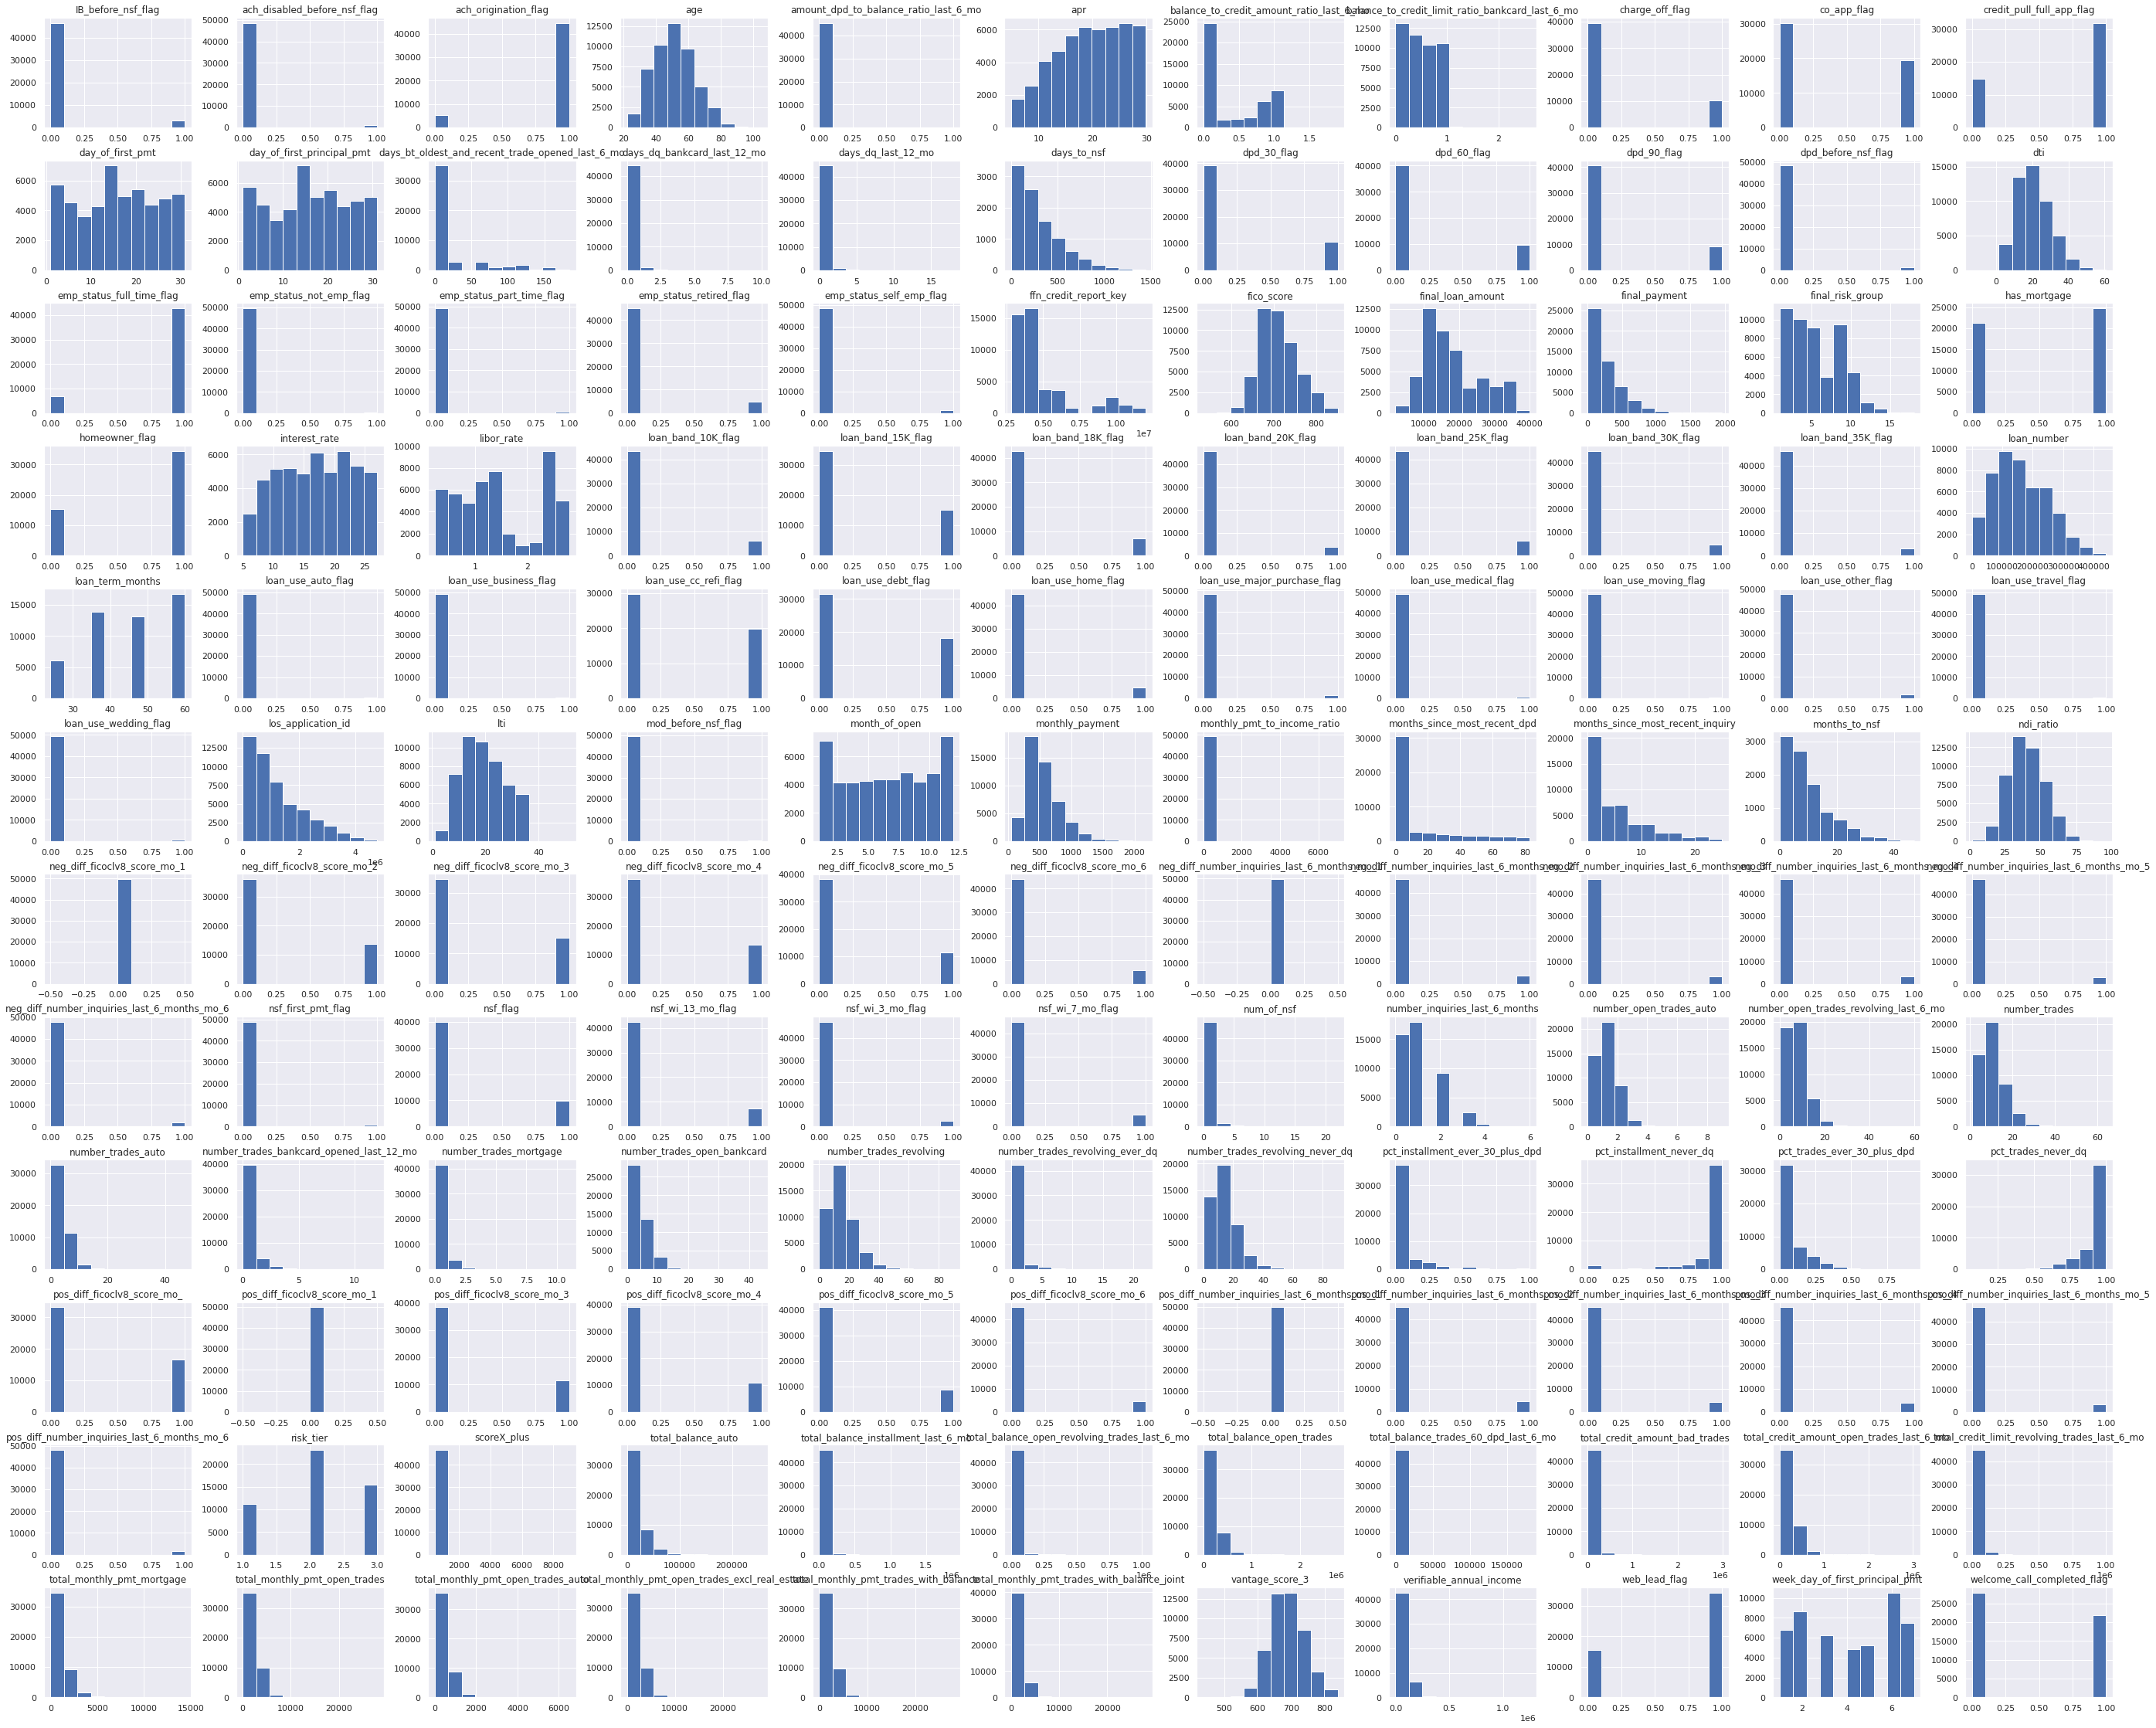

In [ ]:
# histogram of features
raw_data.hist(figsize=(48,40))

plt.show();

## Trying to use income variable

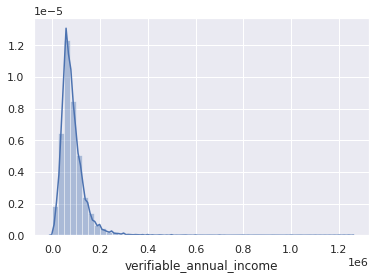

In [ ]:
sns.distplot(raw_data['verifiable_annual_income']);

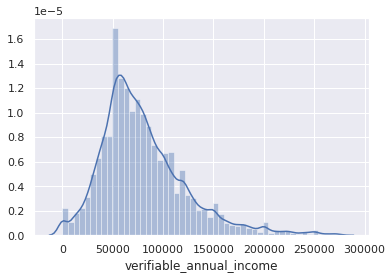

In [ ]:
# One way to deal with outliers seemlessly is to remove the top 1% of observations

q = raw_data['verifiable_annual_income'].quantile(.99)
raw_data_2 = raw_data[raw_data['verifiable_annual_income'] < q]

sns.distplot(raw_data_2['verifiable_annual_income']);

In [ ]:
raw_data_2['pmt_to_monthly_income_ratio'] = raw_data_2['monthly_payment'] / (raw_data_2['verifiable_annual_income'] / 12)
raw_data_2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_number,loan_id,loan_group_short_desc,c_status_code_desc,open_date,closed_date,first_principal_payment_date,initial_chargeoff_date,min_nsf_effective_date,days_to_nsf,months_to_nsf,min_ach_disabled_date,ach_disabled_before_nsf_flag,min_mod_created_date,mod_before_nsf_flag,min_IB_comment_date,IB_before_nsf_flag,min_trial_balance_date,dpd_before_nsf_flag,month_of_open,day_of_first_principal_pmt,week_day_of_first_principal_pmt,ach_origination_flag,welcome_call_completed_flag,los_application_id,age,final_risk_group,risk_tier,dti,lti,ndi_ratio,verifiable_annual_income,final_loan_amount,final_loan_amount_band,loan_band_10K_flag,loan_band_15K_flag,loan_band_18K_flag,loan_band_20K_flag,loan_band_25K_flag,loan_band_30K_flag,...,pct_trades_ever_30_plus_dpd,months_since_most_recent_dpd,days_bt_oldest_and_recent_trade_opened_last_6_mo,total_monthly_pmt_open_trades,total_monthly_pmt_open_trades_excl_real_estate,total_monthly_pmt_trades_with_balance,total_monthly_pmt_trades_with_balance_joint,number_trades_auto,number_open_trades_auto,total_balance_auto,total_monthly_pmt_open_trades_auto,number_trades_open_bankcard,number_trades_bankcard_opened_last_12_mo,days_dq_bankcard_last_12_mo,balance_to_credit_limit_ratio_bankcard_last_6_mo,total_balance_installment_last_6_mo,pct_installment_never_dq,pct_installment_ever_30_plus_dpd,number_inquiries_last_6_months,months_since_most_recent_inquiry,number_trades_mortgage,has_mortgage,total_monthly_pmt_mortgage,number_trades_revolving,number_open_trades_revolving_last_6_mo,number_trades_revolving_never_dq,number_trades_revolving_ever_dq,total_credit_limit_revolving_trades_last_6_mo,total_balance_open_revolving_trades_last_6_mo,num_of_nsf,nsf_flag,nsf_first_pmt_flag,nsf_wi_3_mo_flag,nsf_wi_7_mo_flag,nsf_wi_13_mo_flag,charge_off_flag,dpd_30_flag,dpd_60_flag,dpd_90_flag,pmt_to_monthly_income_ratio
0,245274,APP-02547522,F+,CLOSED,2018-08-21,2019-11-26,2018-09-21,2019-11-26,NaT,NaN,NaN,2019-06-21,0,NaT,0,2019-07-08,0,2019-07-22,0,8,21,6,1,0,2056758.0,69,8.0,3.0,35.4,30.0,59.4,50000.00,14999.99,10K to 15K,0,1,0,0,0,0,...,0.10,63.0,30.0,1422.0,1422.0,1422.0,1422.0,7.0,1.0,21978.0,502.0,1.0,0.0,0.0,0.18,37332.0,0.93,0.07,1.0,3.0,0.0,0.0,0.0,25.0,6.0,22.0,2.0,5300.0,1950.0,0,0,0,0,0,0,1,1,1,1,0.116849
1,93817,APP-00551913,F+,CLOSED,2016-09-07,2019-12-30,2016-10-04,2019-12-30,NaT,NaN,NaN,2019-07-04,0,NaT,0,2019-03-25,0,2017-02-05,0,9,4,3,1,0,437516.0,64,2.0,1.0,38.1,26.6,54.1,75269.15,20000.00,20K to 25K,0,0,0,0,1,0,...,0.07,8.0,0.0,1753.0,1753.0,1753.0,1285.0,4.0,2.0,22901.0,937.0,2.0,0.0,0.0,0.01,57923.0,0.89,0.11,1.0,6.0,0.0,0.0,0.0,12.0,7.0,12.0,0.0,26530.0,3310.0,0,0,0,0,0,0,1,1,1,1,0.072533
2,219775,APP-02015906,F+,CLOSED,2018-05-16,2019-11-26,2018-06-16,2019-11-26,2019-07-16,426.0,14.0,2019-07-16,0,NaT,0,2019-07-01,1,2019-07-18,0,5,16,7,1,1,1666194.0,32,8.0,3.0,18.4,19.5,34.4,75000.00,14622.11,10K to 15K,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,1,1,1,1,0.075938
3,224307,APP-02039640,F+,CLOSED,2018-05-31,2019-12-30,2018-07-07,2019-12-30,2019-08-07,433.0,15.0,2019-08-07,0,NaT,0,2019-04-04,1,2019-08-09,0,5,7,7,1,1,1682181.0,53,5.0,2.0,31.4,31.8,48.8,38004.00,21999.00,20K to 25K,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,1,1,1,1,0.190824
4,224778,APP-02047444,F+,CLOSED,2018-06-04,2019-11-26,2018-07-09,2019-11-26,NaT,NaN,NaN,2019-06-09,0,NaT,0,2019-06-20,0,2019-07-10,0,6,9,2,1,1,1688632.0,70,10.0,3.0,24.0,11.3,50.8,70000.00,7894.74,<10K,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,1,1,1,0.045055


## Correlation Matrix

In [ ]:
# feature selection finding correleated features

correlation_matrix = raw_data.corr().round(2)
print(correlation_matrix)

                              loan_number  ...  dpd_90_flag
loan_number                          1.00  ...         0.03
days_to_nsf                         -0.41  ...         0.04
months_to_nsf                       -0.40  ...         0.04
ach_disabled_before_nsf_flag        -0.05  ...         0.13
mod_before_nsf_flag                 -0.02  ...         0.11
...                                   ...  ...          ...
nsf_wi_13_mo_flag                    0.02  ...         0.45
charge_off_flag                      0.01  ...         0.93
dpd_30_flag                          0.01  ...         0.91
dpd_60_flag                          0.02  ...         0.97
dpd_90_flag                          0.03  ...         1.00

[132 rows x 132 columns]


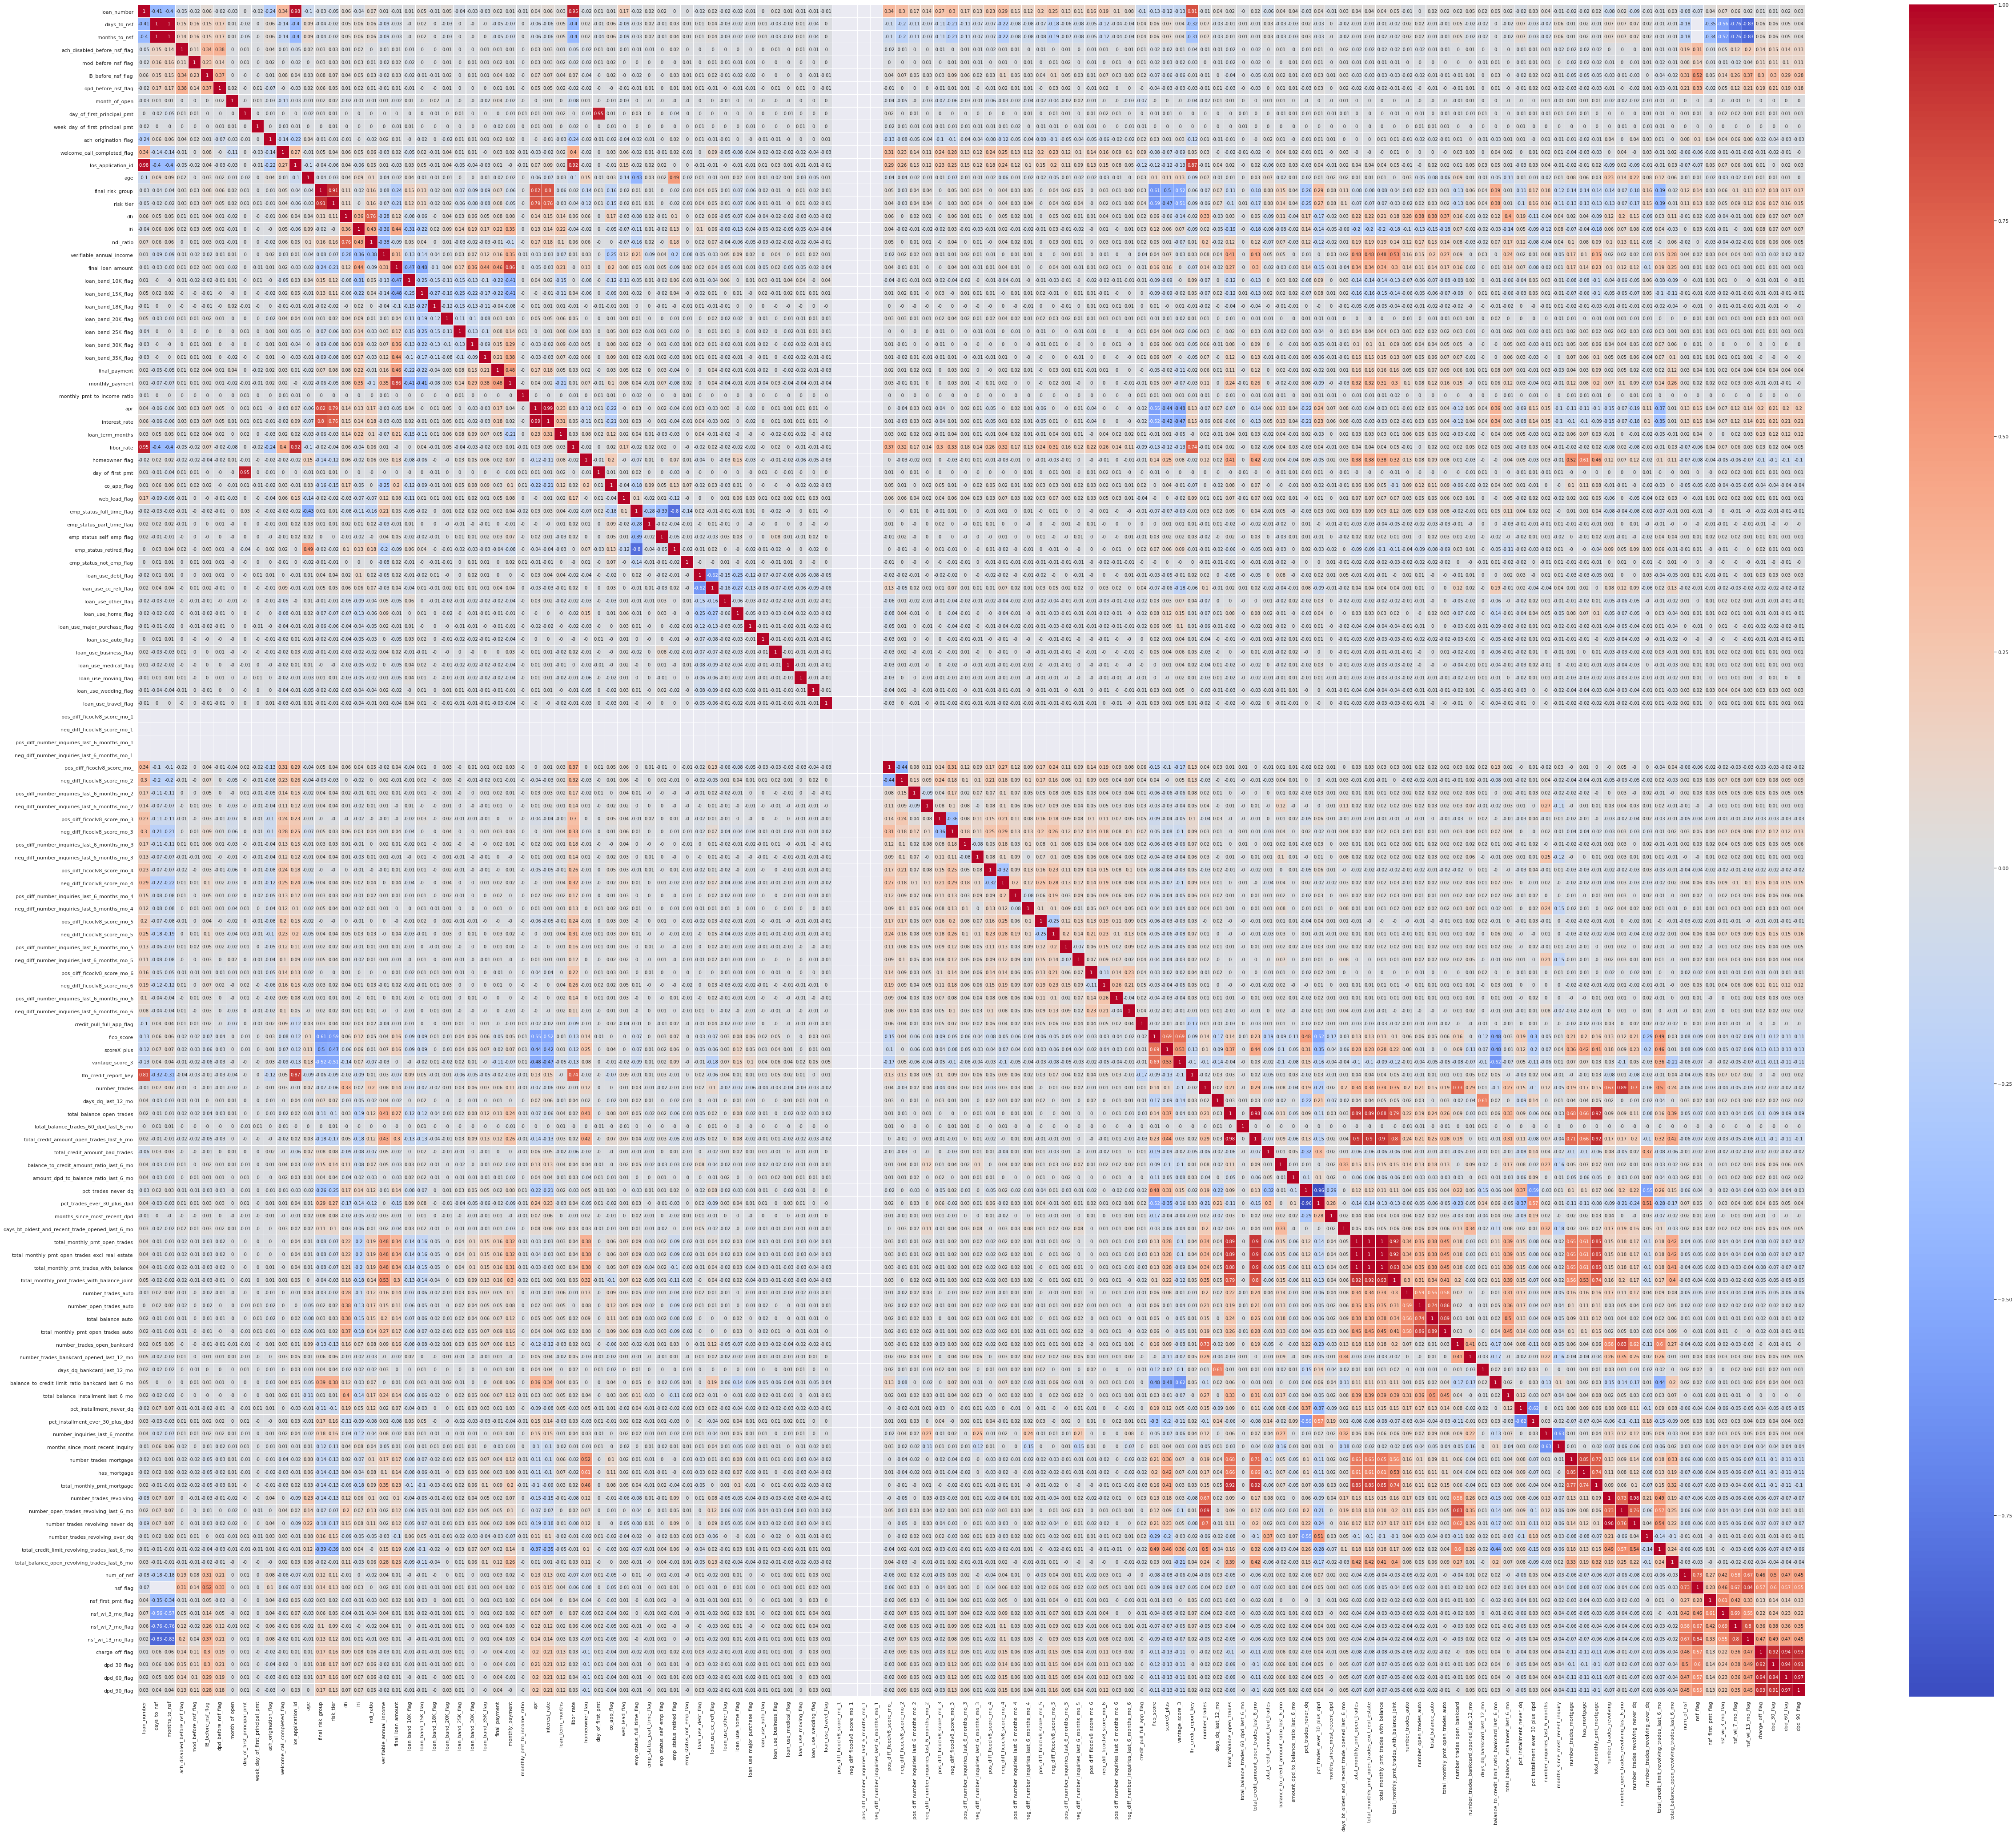

In [ ]:
# plot correaltion matrix using seaborn

fig, ax = plt.subplots(figsize = (84, 70))
sns.heatmap(data=correlation_matrix, annot = True, cmap = 'coolwarm', linewidths=0.1)

plt.show()

# Attempt for NFS wi/ 7 Mo w/:
## ⦿ ACH Disabled Before NSF Flag
## ⦿ IB Before NSF Flag
## ⦿ ACH Origination Flag
## ⦿ Interest Rate
## ⦿ LIBOR Rate
## ⦿ Co App Flag
## ⦿ FICO Score
## ⦿ Number Inquiries Last 6 Mo
## ⦿ Homeowner Flag
## ⦿ Number Trades Revolving Never DQ


In [ ]:
# copy raw data df to set up model
data_1 = raw_data.copy()
data_1 = data_1[['ach_disabled_before_nsf_flag',
                 'IB_before_nsf_flag',
                 'ach_origination_flag',
                 'dpd_before_nsf_flag',
                #  'neg_diff_ficoclv8_score_mo_2',
                #  'neg_diff_ficoclv8_score_mo_3',
                #  'neg_diff_ficoclv8_score_mo_4',
                #  'neg_diff_ficoclv8_score_mo_5',
                #  'neg_diff_ficoclv8_score_mo_6',
                 'interest_rate',
                 'libor_rate',
                 'co_app_flag',
                 'fico_score',
                 'number_inquiries_last_6_months',
                 'homeowner_flag',
                #  'has_mortgage',
                 'number_trades_revolving_never_dq',
                 'nsf_wi_7_mo_flag'
                 ]]
data_1

,ach_disabled_before_nsf_flag,IB_before_nsf_flag,ach_origination_flag,dpd_before_nsf_flag,interest_rate,libor_rate,co_app_flag,fico_score,number_inquiries_last_6_months,homeowner_flag,number_trades_revolving_never_dq,nsf_wi_7_mo_flag
0,0,0,1,0,17.49,2.60,0,684.0,1.0,0,9.0,0
1,0,1,1,0,18.99,2.44,0,692.0,2.0,1,15.0,1
2,0,0,1,0,22.49,1.32,0,689.0,1.0,1,10.0,0
3,0,1,1,1,21.74,2.01,1,616.0,2.0,0,3.0,0
4,0,0,1,0,9.99,1.33,1,700.0,1.0,0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49736,0,0,0,0,22.49,1.75,0,650.0,0.0,1,5.0,0
49737,0,1,0,1,12.49,1.31,0,689.0,1.0,0,18.0,0
49738,0,0,1,0,23.99,0.30,0,673.0,1.0,1,7.0,0
49739,0,0,1,0,25.99,0.64,1,658.0,2.0,0,17.0,0


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49741 entries, 0 to 49740
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ach_disabled_before_nsf_flag      49741 non-null  int64  
 1   IB_before_nsf_flag                49741 non-null  int64  
 2   ach_origination_flag              49741 non-null  int64  
 3   dpd_before_nsf_flag               49741 non-null  int64  
 4   interest_rate                     49741 non-null  float64
 5   libor_rate                        49739 non-null  float64
 6   co_app_flag                       49741 non-null  int64  
 7   fico_score                        46556 non-null  float64
 8   number_inquiries_last_6_months    45880 non-null  float64
 9   homeowner_flag                    49741 non-null  int64  
 10  number_trades_revolving_never_dq  45880 non-null  float64
 11  nsf_wi_7_mo_flag                  49741 non-null  int64  
dtypes: f

In [ ]:
# check for n/a
data_1.isna().sum()

ach_disabled_before_nsf_flag           0
IB_before_nsf_flag                     0
ach_origination_flag                   0
dpd_before_nsf_flag                    0
interest_rate                          0
libor_rate                             2
co_app_flag                            0
fico_score                          3185
number_inquiries_last_6_months      3861
homeowner_flag                         0
number_trades_revolving_never_dq    3861
nsf_wi_7_mo_flag                       0
dtype: int64

In [ ]:
# remove records with n/a
data_1 = data_1.dropna(subset=['number_inquiries_last_6_months', 'fico_score'])

In [ ]:
# check again for n/a
data_1.isna().sum()

ach_disabled_before_nsf_flag        0
IB_before_nsf_flag                  0
ach_origination_flag                0
dpd_before_nsf_flag                 0
interest_rate                       0
libor_rate                          0
co_app_flag                         0
fico_score                          0
number_inquiries_last_6_months      0
homeowner_flag                      0
number_trades_revolving_never_dq    0
nsf_wi_7_mo_flag                    0
dtype: int64

## Train Test Split Data

In [ ]:
train, test = train_test_split(data_1, test_size=.2, random_state=42)

In [ ]:
train

,ach_disabled_before_nsf_flag,IB_before_nsf_flag,ach_origination_flag,dpd_before_nsf_flag,interest_rate,libor_rate,co_app_flag,fico_score,number_inquiries_last_6_months,homeowner_flag,number_trades_revolving_never_dq,nsf_wi_7_mo_flag
43850,0,0,1,0,11.99,0.86,0,728.0,0.0,1,8.0,0
48323,0,0,1,0,14.49,2.61,1,738.0,1.0,1,12.0,0
34812,0,0,1,0,20.24,2.32,1,674.0,1.0,1,13.0,0
35137,0,0,1,0,9.74,2.36,1,698.0,1.0,1,14.0,0
48833,0,0,1,0,14.49,1.40,0,744.0,3.0,1,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12254,0,0,1,0,25.49,2.64,1,671.0,0.0,0,20.0,0
48500,0,1,0,1,19.24,2.33,1,717.0,1.0,1,14.0,1
41365,0,0,1,0,19.99,1.05,0,788.0,2.0,1,20.0,0
924,0,0,1,0,8.99,1.32,1,679.0,1.0,0,25.0,0


In [ ]:
# check how many records actually have target variable
train['nsf_wi_7_mo_flag'].value_counts()

0    33067
1     3637
Name: nsf_wi_7_mo_flag, dtype: int64

In [ ]:
test

,ach_disabled_before_nsf_flag,IB_before_nsf_flag,ach_origination_flag,dpd_before_nsf_flag,interest_rate,libor_rate,co_app_flag,fico_score,number_inquiries_last_6_months,homeowner_flag,number_trades_revolving_never_dq,nsf_wi_7_mo_flag
20871,0,0,1,0,24.49,2.63,0,704.0,2.0,0,13.0,0
36387,0,0,1,0,12.49,2.78,0,759.0,3.0,1,15.0,0
43897,0,0,1,0,26.49,2.56,0,644.0,1.0,0,4.0,0
43501,0,0,1,0,23.99,0.63,0,630.0,1.0,1,4.0,0
13418,0,0,1,0,12.99,1.14,1,733.0,1.0,1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13301,0,0,1,0,8.49,0.63,0,784.0,1.0,1,21.0,0
40504,0,0,0,0,5.99,2.31,0,787.0,1.0,1,36.0,0
18577,0,0,1,0,9.49,0.32,1,752.0,0.0,1,16.0,0
42399,0,0,1,0,12.74,2.31,0,751.0,2.0,0,24.0,0


In [ ]:
# check how many records actually have target variable
test['nsf_wi_7_mo_flag'].value_counts()

0    8252
1     924
Name: nsf_wi_7_mo_flag, dtype: int64

## Declare Variables

In [ ]:
# To avoid re-writing them out, will save the predictors in a list,
# and save the target in a variable
predictors = ['ach_disabled_before_nsf_flag',
              'ach_origination_flag',
              'IB_before_nsf_flag',
              'dpd_before_nsf_flag',
            #   'neg_diff_ficoclv8_score_mo_2',
            #   'neg_diff_ficoclv8_score_mo_3',
            #   'neg_diff_ficoclv8_score_mo_4',
            #   'neg_diff_ficoclv8_score_mo_5',
            #   'neg_diff_ficoclv8_score_mo_6',
              'interest_rate',
              'libor_rate',
              'co_app_flag',
              'fico_score',
              'number_inquiries_last_6_months',
              'homeowner_flag',
            #   'has_mortgage',
              'number_trades_revolving_never_dq'
              ]
target = 'nsf_wi_7_mo_flag'

In [ ]:
# Train
y_train = train[target]
x1_train = train[predictors]

In [ ]:
# Test
y_test = test[target]
x1_test = test[predictors]

## Train Model - statsmodels

In [ ]:
# add constant
x_train = sm.add_constant(x1_train)
log_reg_train = sm.Logit(y_train, x_train)
results_log_train = log_reg_train.fit()

Optimization terminated successfully.
         Current function value: 0.289071
         Iterations 7


### statsmodels - Results Summary

In [ ]:
results_log_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       nsf_wi_7_mo_flag   No. Observations:                36704
Model:                          Logit   Df Residuals:                    36692
Method:                           MLE   Df Model:                           11
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:                  0.1053
Time:                        21:04:27   Log-Likelihood:                -10610.
converged:                       True   LL-Null:                       -11858.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -4.4270      0.408    -10.847      0.000      -5.227      -3.627
ach_disabled_before_nsf_flag         0.3544      0.094      3.782      0.000       0.171       0.538
ach_origination_flag                 1.0462      0.081     12.863      0.000       0.887       1.206
IB_before_nsf_flag                   1.7707      0.054     32.561      0.000       1.664       1.877
dpd_before_nsf_flag                  0.3107      0.091      3.409      0.001       0.132       0.489
interest_rate                        0.0497      0.004     13.152      0.000       0.042       0.057
libor_rate                           0.2452      0.025      9.961      0.000       0.197       0.293
co_app_flag                         -0.2860      0.041     -6.934      0.000      -0.367      -0.205
fico_score                           0.0002      0.001      0.347      0.728      -0.001       0.001
number_inquiries_last_6_months       0.1152      0.020      5.843      0.000       0.077       0.154
homeowner_flag                      -0.2314      0.039     -5.918      0.000      -0.308      -0.155
number_trades_revolving_never_dq    -0.0179      0.002     -7.348      0.000      -0.023      -0.013
====================================================================================================
"""

#### Confusion Matrix - Train

In [ ]:
results_log_train.pred_table()

array([[32827.,   240.],
       [ 3385.,   252.]])

In [ ]:
# format confusion matrix (cm)
cm_train_df = pd.DataFrame(results_log_train.pred_table())
cm_train_df.columns = ['Predicted 0', 'Predicted 1']
cm_train_df = cm_train_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_train_df

,Predicted 0,Predicted 1
Actual 0,32827.0,240.0
Actual 1,3385.0,252.0


In [ ]:
# convert df to array to print accuracy stats
cm_train = np.array(cm_train_df)

In [ ]:
print('Correct Cases: ', (cm_train[0,0]+cm_train[1,1]))
print('\nIncorrect Cases: ', (cm_train[0,1]+cm_train[1,0]))
print('\nTotal Cases: ', cm_train.sum())

Correct Cases:  33079.0

Incorrect Cases:  3625.0

Total Cases:  36704.0


#### Misclassifaction % - Train

In [ ]:
misclassification_train = (cm_train[0,1]+cm_train[1,0])/cm_train.sum()
misclassification_train

0.09876307759372276

#### Accuracy % - Train

In [ ]:
accuracy_train = (cm_train[0,0]+cm_train[1,1])/cm_train.sum()
accuracy_train

0.9012369224062773

#### statsmodels - Training Deciles

In [ ]:
# predict on training data
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log_train.predict()

array([0.20, 0.29, 0.07, ..., 0.09, 0.11, 0.04])

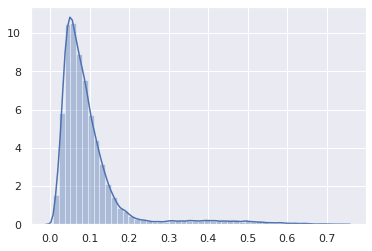

In [ ]:
# distribution of probabilities that model is outputting
pred_probs = results_log_train.predict()
sns.distplot(pred_probs);

In [ ]:
# breakout predicted probabilities into deciles
deciles = np.percentile(pred_probs, np.arange(0,100,10))
deciles

array([0.01, 0.04, 0.05, 0.05, 0.06, 0.07, 0.09, 0.10, 0.12, 0.16])

In [ ]:
# train_pred_df = pd.DataFrame({'deciles': deciles.round(2), 'pred_probs': pred_probs})

train_pred_df = pd.DataFrame({'y_pred_train_sm': pred_probs})
joined_df = train.join(train_pred_df)
joined_df.head()

,ach_disabled_before_nsf_flag,IB_before_nsf_flag,ach_origination_flag,dpd_before_nsf_flag,interest_rate,libor_rate,co_app_flag,fico_score,number_inquiries_last_6_months,homeowner_flag,number_trades_revolving_never_dq,nsf_wi_7_mo_flag,y_pred_train_sm
43829,0,0,1,0,26.49,2.31,0,690.0,2.0,1,2.0,1,NaN
48293,0,1,1,0,14.24,2.25,1,694.0,0.0,1,8.0,0,NaN
34769,0,0,1,0,16.49,0.84,1,724.0,0.0,0,7.0,0,0.111565
35086,1,1,0,1,9.99,1.45,0,747.0,3.0,1,12.0,0,0.066048
48827,0,0,1,0,20.99,1.33,0,667.0,2.0,0,18.0,0,NaN


In [ ]:
joined_df['decile_rank']=pd.qcut(joined_df['y_pred_train_sm'], 10, labels=False)

In [ ]:
deciles = joined_df.groupby(
    'decile_rank'
).agg(
    {
        # Get the min, max, and mean of the predictions
		# min and max will help you see the boundaries of each decile
        'y_pred_train_sm': [min, max, "mean"],
        # Get the mean of the actuals
        'nsf_wi_7_mo_flag': ["mean"],
    }
)

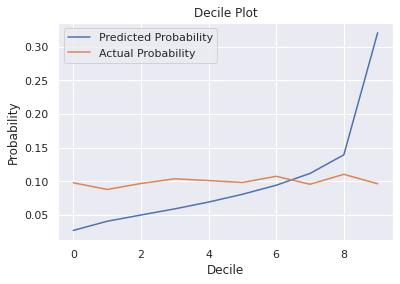

In [ ]:
# Plot training & validation accuracy values
plt.plot(deciles.y_pred_train_sm['mean'])
plt.plot(deciles.nsf_wi_7_mo_flag['mean'])
plt.title('Decile Plot')
plt.ylabel('Probability')
plt.xlabel('Decile')
plt.legend(['Predicted Probability', 'Actual Probability'], loc='upper left')
plt.show()

### statsmodels - Test Results Summary

In [ ]:
# add constant
x_test = sm.add_constant(x1_test)
log_reg_test = sm.Logit(y_test, x_test)
results_log_test = log_reg_test.fit()

Optimization terminated successfully.
         Current function value: 0.285758
         Iterations 7


In [ ]:
results_log_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       nsf_wi_7_mo_flag   No. Observations:                36704
Model:                          Logit   Df Residuals:                    36692
Method:                           MLE   Df Model:                           11
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:                  0.1053
Time:                        21:04:28   Log-Likelihood:                -10610.
converged:                       True   LL-Null:                       -11858.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -4.4270      0.408    -10.847      0.000      -5.227      -3.627
ach_disabled_before_nsf_flag         0.3544      0.094      3.782      0.000       0.171       0.538
ach_origination_flag                 1.0462      0.081     12.863      0.000       0.887       1.206
IB_before_nsf_flag                   1.7707      0.054     32.561      0.000       1.664       1.877
dpd_before_nsf_flag                  0.3107      0.091      3.409      0.001       0.132       0.489
interest_rate                        0.0497      0.004     13.152      0.000       0.042       0.057
libor_rate                           0.2452      0.025      9.961      0.000       0.197       0.293
co_app_flag                         -0.2860      0.041     -6.934      0.000      -0.367      -0.205
fico_score                           0.0002      0.001      0.347      0.728      -0.001       0.001
number_inquiries_last_6_months       0.1152      0.020      5.843      0.000       0.077       0.154
homeowner_flag                      -0.2314      0.039     -5.918      0.000      -0.308      -0.155
number_trades_revolving_never_dq    -0.0179      0.002     -7.348      0.000      -0.023      -0.013
====================================================================================================
"""

#### Confusion Matrix - Test

In [ ]:
results_log_test.pred_table()

array([[8164.00, 88.00],
       [831.00, 93.00]])

In [ ]:
# format confusion matrix (cm)
cm_test_df = pd.DataFrame(results_log_test.pred_table())
cm_test_df.columns = ['Predicted 0', 'Predicted 1']
cm_test_df = cm_test_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_test_df

,Predicted 0,Predicted 1
Actual 0,8164.0,88.0
Actual 1,831.0,93.0


In [ ]:
# convert df to array to print accuracy stats
cm_test = np.array(cm_test_df)

In [ ]:
print('Correct Cases: ', (cm_test[0,0]+cm_test[1,1]))
print('\nIncorrect Cases: ', (cm_test[0,1]+cm_test[1,0]))
print('\nTotal Cases: ', cm_test.sum())

Correct Cases:  8257.0

Incorrect Cases:  919.0

Total Cases:  9176.0


#### Misclassification % - Test

In [ ]:
misclassification_test = (cm_test[0,1]+cm_test[1,0])/cm_test.sum()
misclassification_test

0.10015257192676548

#### Accuracy % - Test

In [ ]:
accuracy_test = (cm_test[0,0]+cm_test[1,1])/cm_test.sum()
accuracy_test

0.8998474280732345

## Train Model - sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000)
model.fit(x1_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### sklearn - Training Deciles

In [ ]:
# first column is probability of not
# second column is probability of yes
y_pred_train_skl = model.predict_proba(x1_train)
y_pred_train_skl

array([[0.63372497, 0.36627503],
       [0.64339693, 0.35660307],
       [0.55866576, 0.44133424],
       ...,
       [0.58817948, 0.41182052],
       [0.68942954, 0.31057046],
       [0.4150375 , 0.5849625 ]])

In [ ]:
train['y_pred_train_skl'] = y_pred_train_skl[:,1]
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ach_disabled_before_nsf_flag,IB_before_nsf_flag,ach_origination_flag,dpd_before_nsf_flag,interest_rate,libor_rate,co_app_flag,fico_score,number_inquiries_last_6_months,homeowner_flag,number_trades_revolving_never_dq,nsf_wi_7_mo_flag,y_pred_train_skl
43850,0,0,1,0,11.99,0.86,0,728.0,0.0,1,8.0,0,0.366275
48323,0,0,1,0,14.49,2.61,1,738.0,1.0,1,12.0,0,0.356603
34812,0,0,1,0,20.24,2.32,1,674.0,1.0,1,13.0,0,0.441334
35137,0,0,1,0,9.74,2.36,1,698.0,1.0,1,14.0,0,0.323429
48833,0,0,1,0,14.49,1.40,0,744.0,3.0,1,22.0,0,0.417976


In [ ]:
train.isna().sum()

ach_disabled_before_nsf_flag        0
IB_before_nsf_flag                  0
ach_origination_flag                0
dpd_before_nsf_flag                 0
interest_rate                       0
libor_rate                          0
co_app_flag                         0
fico_score                          0
number_inquiries_last_6_months      0
homeowner_flag                      0
number_trades_revolving_never_dq    0
nsf_wi_7_mo_flag                    0
y_pred_train_skl                    0
dtype: int64

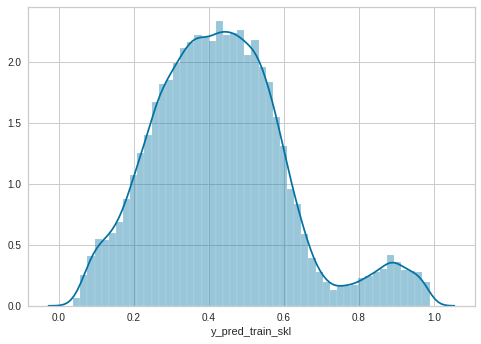

In [ ]:
# distribution of probabilities that model is outputting
sns.distplot(train['y_pred_train_skl']);

In [ ]:
# breakout predicted probabilities into deciles
deciles = np.percentile(train['y_pred_train_skl'], np.arange(0,100,10))
deciles

array([0.03789259, 0.21242883, 0.27866621, 0.33033555, 0.37594966,
       0.42125354, 0.46552864, 0.51147394, 0.56079189, 0.63860858])

In [ ]:
# add deciles to the predictions
train['decile_rank']=pd.qcut(train['y_pred_train_skl'], 10, labels=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
deciles = train.groupby(
    'decile_rank'
).agg(
    {
        # Get the min, max, and mean of the predictions
		# min and max will help you see the boundaries of each decile
        'y_pred_train_skl': [min, max, "mean"],
        # Get the mean of the actuals
        'nsf_wi_7_mo_flag': ["mean"],
    }
)

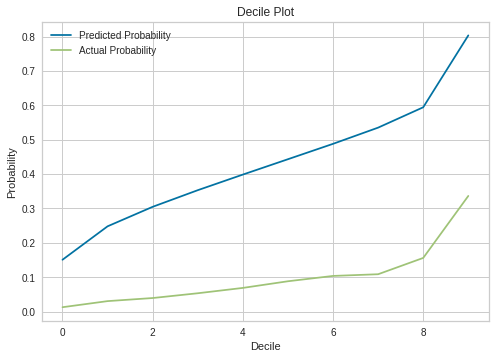

In [ ]:
# Plot training & validation accuracy values
plt.plot(deciles.y_pred_train_skl['mean'])
plt.plot(deciles.nsf_wi_7_mo_flag['mean'])
plt.title('Decile Plot')
plt.ylabel('Probability')
plt.xlabel('Decile')
plt.legend(['Predicted Probability', 'Actual Probability'], loc='upper left')
plt.show()

### sklearn - Results Summary

In [ ]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport

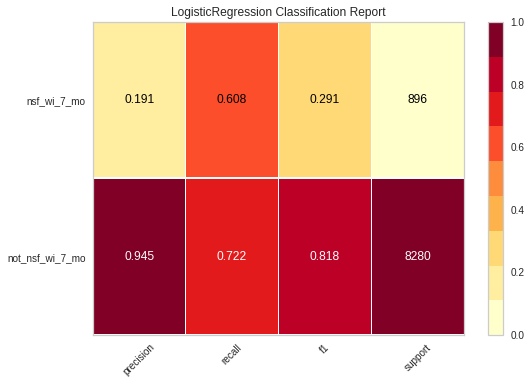


precision = Percent of predicted results that were actually correct
recall = Percent of all the true results that we correctly predicted
f1-score = Harmonic mean of precision and recall


In [ ]:
# Instantiate the classification model and visualizer
classes = ['not_nsf_wi_7_mo', 'nsf_wi_7_mo']
visualizer = ClassificationReport(model, classes=classes, support=True)
visualizer.fit(x1_train, y_train)  # Fit the visualizer and the model
visualizer.score(x1_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
print('\nprecision = Percent of predicted results that were actually correct')
print('recall = Percent of all the true results that we correctly predicted')
print('f1-score = Harmonic mean of precision and recall')

In [ ]:
y_pred_train_skl = model.predict_proba(x1_train)
y_pred_train_skl

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(x1_test, y_test, normalize=False)


In [ ]:
x1_test

,ach_disabled_before_nsf_flag,ach_origination_flag,IB_before_nsf_flag,dpd_before_nsf_flag,interest_rate,libor_rate,co_app_flag,fico_score,number_inquiries_last_6_months,homeowner_flag,number_trades_revolving_never_dq
20913,0,1,0,0,24.49,1.57,0,655.0,1.0,0,39.0
36399,0,1,0,0,13.99,1.18,0,672.0,0.0,0,14.0
43916,0,1,0,0,15.49,1.32,0,668.0,0.0,1,15.0
43535,0,1,0,0,17.99,1.16,0,646.0,1.0,1,12.0
13481,0,0,0,0,10.74,2.35,1,705.0,0.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
13368,0,1,0,0,26.49,2.34,0,709.0,1.0,0,10.0
40516,0,1,0,0,9.49,1.31,0,773.0,1.0,1,14.0
18623,0,1,0,0,19.99,1.36,0,682.0,2.0,0,19.0
42415,0,0,0,0,20.49,1.34,1,784.0,1.0,1,15.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


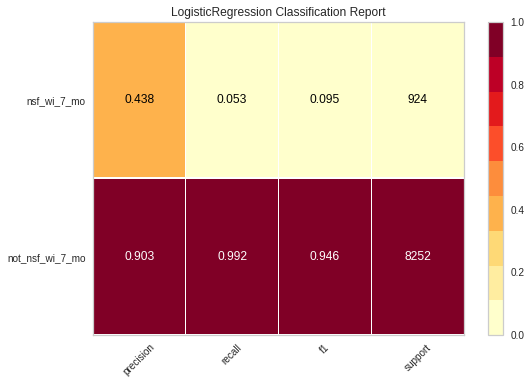


precision = Percent of predicted results that were actually correct
recall = Percent of all the true results that we correctly predicted
f1-score = Harmonic mean of precision and recall


In [ ]:
# Instantiate the classification model and visualizer
classes = ['not_nsf_wi_7_mo', 'nsf_wi_7_mo']
visualizer = ClassificationReport(model, classes=classes, support=True)
visualizer.fit(x1_train, y_train)  # Fit the visualizer and the model
visualizer.score(x1_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
print('\nprecision = Percent of predicted results that were actually correct')
print('recall = Percent of all the true results that we correctly predicted')
print('f1-score = Harmonic mean of precision and recall')

### sklearn - Test Deciles

In [ ]:
y_pred_test_skl = model.predict_proba(x1_test)
y_pred_test_skl

array([[0.82, 0.18],
       [0.91, 0.09],
       [0.77, 0.23],
       ...,
       [0.97, 0.03],
       [0.91, 0.09],
       [0.94, 0.06]])

In [ ]:
test['y_pred_test_skl'] = y_pred_test_skl[:,1]
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ach_disabled_before_nsf_flag,IB_before_nsf_flag,ach_origination_flag,dpd_before_nsf_flag,interest_rate,libor_rate,co_app_flag,fico_score,number_inquiries_last_6_months,homeowner_flag,number_trades_revolving_never_dq,nsf_wi_7_mo_flag,y_pred_test_skl
20871,0,0,1,0,24.49,2.63,0,704.0,2.0,0,13.0,0,0.175615
36387,0,0,1,0,12.49,2.78,0,759.0,3.0,1,15.0,0,0.089993
43897,0,0,1,0,26.49,2.56,0,644.0,1.0,0,4.0,0,0.231096
43501,0,0,1,0,23.99,0.63,0,630.0,1.0,1,4.0,0,0.135992
13418,0,0,1,0,12.99,1.14,1,733.0,1.0,1,4.0,0,0.051693


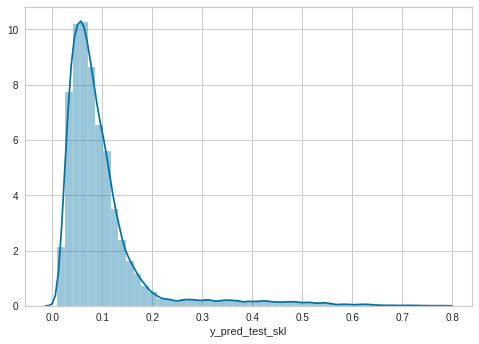

In [ ]:
# distribution of probabilities that model is outputting
sns.distplot(test['y_pred_test_skl']);

In [ ]:
# breakout predicted probabilities into deciles
deciles_test = np.percentile(test['y_pred_test_skl'], np.arange(0,100,10))
deciles_test

array([0.01, 0.04, 0.05, 0.06, 0.06, 0.07, 0.09, 0.10, 0.12, 0.16])

In [ ]:
# add deciles to the predictions
test['decile_rank']=pd.qcut(test['y_pred_test_skl'], 10, labels=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
deciles_test = test.groupby(
    'decile_rank'
).agg(
    {
        # Get the min, max, and mean of the predictions
		# min and max will help you see the boundaries of each decile
        'y_pred_test_skl': [min, max, "mean"],
        # Get the mean of the actuals
        'nsf_wi_7_mo_flag': ["mean"],
    }
)

In [ ]:
deciles_test

y_pred_test_skl                     nsf_wi_7_mo_flag
                        min       max      mean             mean
decile_rank                                                     
0                  0.009852  0.035189  0.027281         0.025054
1                  0.035217  0.045339  0.040406         0.029412
2                  0.045357  0.055071  0.050279         0.037077
3                  0.055092  0.064485  0.059815         0.059913
4                  0.064529  0.074984  0.069658         0.057797
5                  0.075004  0.086898  0.080805         0.081699
6                  0.086948  0.102016  0.094229         0.102508
7                  0.102028  0.121340  0.110786         0.125272
8                  0.121382  0.164087  0.138783         0.143948
9                  0.164136  0.775880  0.313539         0.344227

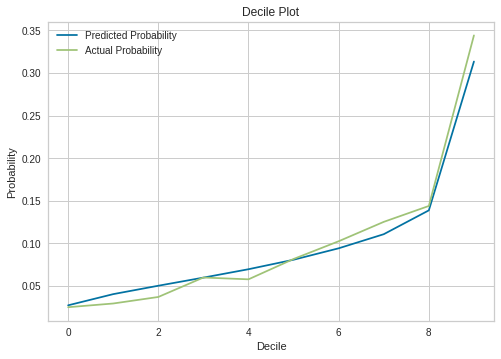

In [ ]:
# Plot training & validation accuracy values
plt.plot(deciles_test.y_pred_test_skl['mean'])
plt.plot(deciles_test.nsf_wi_7_mo_flag['mean'])
plt.title('Decile Plot')
plt.ylabel('Probability')
plt.xlabel('Decile')
plt.legend(['Predicted Probability', 'Actual Probability'], loc='upper left')
plt.show()

## Train Model - Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
class_prior = [0.9, 0.1]

In [ ]:
model_bayes = BernoulliNB(class_prior=class_prior)
model_bayes.fit(x1_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=True)

### Naive Bayes - Results Summary

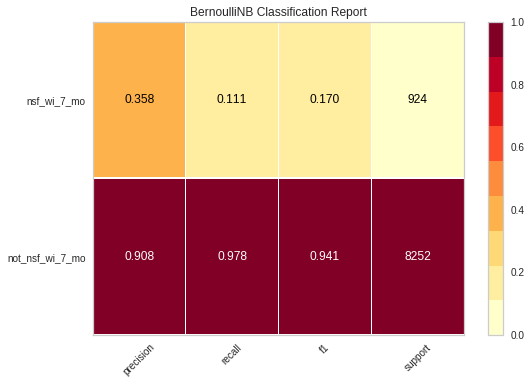

In [ ]:
# Naive Bayes Model
# prior is set to 50/50 for each class
class_prior = [0.9, 0.1]
bayes = BernoulliNB(class_prior=class_prior)
# Instantiate the visualizer with the classification model
# visualizer = ROCAUC(bayes, classes=classes)
visualizer = ClassificationReport(bayes, classes=classes, support=True)
visualizer.fit(x1_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x1_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### Naive Bayes Test Deciles

In [ ]:
y_pred_test_bayes = model_bayes.predict_proba(x1_test)

In [ ]:
y_pred_test_bayes

array([[0.88, 0.12],
       [0.92, 0.08],
       [0.88, 0.12],
       ...,
       [0.96, 0.04],
       [0.88, 0.12],
       [0.93, 0.07]])

In [ ]:
test['y_pred_test_bayes'] = y_pred_test_bayes[:,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# add deciles to the predictions
test['decile_rank_bayes']=pd.qcut(test['y_pred_test_bayes'], 10, labels=False, duplicates='drop')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
deciles_test_bayes = test.groupby(
    'decile_rank_bayes'
).agg(
    {
        # Get the min, max, and mean of the predictions
		# min and max will help you see the boundaries of each decile
        'y_pred_test_bayes': [min, max, "mean"],
        # Get the mean of the actuals
        'nsf_wi_7_mo_flag': ["mean"],
    }
)
deciles_test_bayes

y_pred_test_bayes                     nsf_wi_7_mo_flag
                                min       max      mean             mean
decile_rank_bayes                                                       
0                          0.019215  0.044711  0.037130         0.025735
1                          0.053172  0.054437  0.054351         0.050907
2                          0.065715  0.065715  0.065715         0.061975
3                          0.067664  0.079629  0.078501         0.088965
4                          0.081955  0.081955  0.081955         0.086387
5                          0.089316  0.098341  0.098299         0.107858
6                          0.107002  0.118289  0.118267         0.130189
7                          0.127824  0.951039  0.469489         0.424490

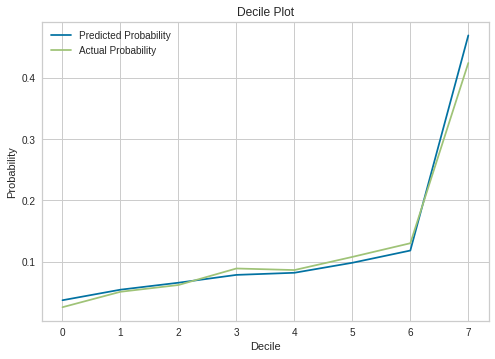

In [ ]:
# Plot training & validation accuracy values
plt.plot(deciles_test_bayes.y_pred_test_bayes['mean'])
plt.plot(deciles_test_bayes.nsf_wi_7_mo_flag['mean'])
plt.title('Decile Plot')
plt.ylabel('Probability')
plt.xlabel('Decile')
plt.legend(['Predicted Probability', 'Actual Probability'], loc='upper left')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

In [ ]:
RForest = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)

In [ ]:
start_time = time.clock()
RForest.fit(x1_train, y_train)
end_time = time.clock()
run_time = end_time - start_time
print('Random Forest Training Time = ', np.round(run_time, decimals=2))

Random Forest Training Time =  5.97


In [ ]:
var_importance = pd.DataFrame({'Variable': x1_train.columns,
                               'Importance': RForest.feature_importances_
                               })
var_importance.sort_values(by='Importance', ascending=False)

,Variable,Importance
2,IB_before_nsf_flag,0.272408
5,libor_rate,0.214528
4,interest_rate,0.108793
7,fico_score,0.096476
10,number_trades_revolving_never_dq,0.077692
0,ach_disabled_before_nsf_flag,0.058659
3,dpd_before_nsf_flag,0.055362
1,ach_origination_flag,0.044834
8,number_inquiries_last_6_months,0.035243
9,homeowner_flag,0.018966


### Random Forest - Results Summary

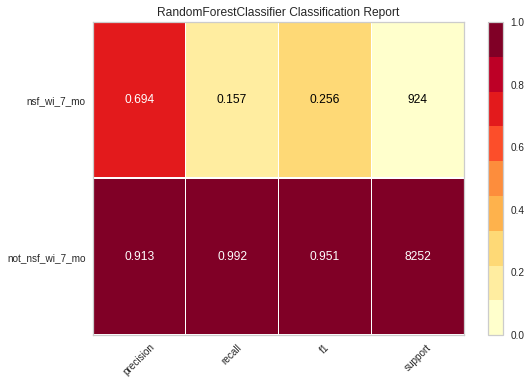


precision = Percent of predicted results that were actually correct
recall = Percent of all the true results that we correctly predicted
f1-score = Harmonic mean of precision and recall


In [ ]:
# Instantiate the classification model and visualizer
classes = ['not_nsf_wi_7_mo', 'nsf_wi_7_mo']
visualizer = ClassificationReport(RForest, classes=classes, support=True)
visualizer.fit(x1_train, y_train)  # Fit the visualizer and the model
visualizer.score(x1_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
print('\nprecision = Percent of predicted results that were actually correct')
print('recall = Percent of all the true results that we correctly predicted')
print('f1-score = Harmonic mean of precision and recall')

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# segment out the variable we are predicting from the rest of the data
Y = raw_data.filter(['nsf_wi_7_mo_flag'])
X = raw_data.drop(['nsf_wi_7_mo_flag',
                   'nsf_wi_3_mo_flag',
                   'nsf_wi_13_mo_flag',
                   'num_of_nsf',
                   'nsf_flag',
                   'nsf_first_pmt_flag',
                   'charge_off_flag',
                   'dpd_before_nsf_flag',
                   'dpd_30_flag',
                   'dpd_60_flag',
                   'dpd_90_flag',
                   'days_to_nsf',
                   'months_to_nsf'
                   ], axis = 1)
X = X.select_dtypes(include='number')
X = X.fillna(X.mean())
print(X.shape, Y.shape)

(49741, 119) (49741, 1)


In [ ]:
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp = imp.fit(X)

# # Impute our data, then train
# X = imp.transform(X)

In [ ]:
# Split the data into a train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(37305, 119) (37305, 1)
(12436, 119) (12436, 1)


In [ ]:
# # Impute our data, then train
# X_train_imp = imp.transform(X_train)

In [ ]:
# X_test_imp = imp.transform(X_test)

/usr/local/lib/python3.6/dist-packages/yellowbrick/classifier/base.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


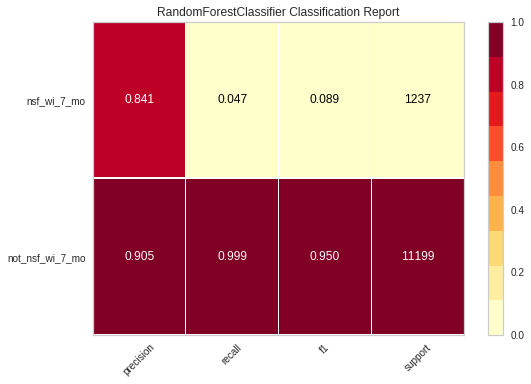


precision = Percent of predicted results that were actually correct
recall = Percent of all the true results that we correctly predicted
f1-score = Harmonic mean of precision and recall


In [ ]:
# Instantiate the classification model and visualizer
classes = ['not_nsf_wi_7_mo', 'nsf_wi_7_mo']
visualizer = ClassificationReport(RForest, classes=classes, support=True)
visualizer.fit(X_train, Y_train)  # Fit the visualizer and the model
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
print('\nprecision = Percent of predicted results that were actually correct')
print('recall = Percent of all the true results that we correctly predicted')
print('f1-score = Harmonic mean of precision and recall')

In [ ]:
start_time = time.clock()
RForest.fit(X_train, Y_train)
end_time = time.clock()
run_time = end_time - start_time
print('Random Forest Training Time = ', np.round(run_time, decimals=2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Training Time =  23.43


In [ ]:
var_importance_all = pd.DataFrame({'Variable': X.columns,
                               'Importance': RForest.feature_importances_
                               })
var_importance_all = var_importance_all.sort_values(by='Importance', ascending=False)

In [ ]:
var_importance_all.head(20)

,Variable,Importance
3,IB_before_nsf_flag,0.141484
9,los_application_id,0.031992
31,libor_rate,0.031059
0,loan_number,0.030972
28,apr,0.027886
1,ach_disabled_before_nsf_flag,0.027798
80,ffn_credit_report_key,0.026218
29,interest_rate,0.024413
16,verifiable_annual_income,0.020884
117,total_credit_limit_revolving_trades_last_6_mo,0.019342
